# Decision Tree Classifier

#### Name Sidhantha Poddar
#### Roll no 17bce2044


https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For
digitization, an industrial camera usually used for print inspection was used. The final images have 400x
400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a
resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from
images.
Attribute Information:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [6]:
#Importing The Dataset
dataset=pd.read_csv('bill_authentication.csv')
#Getting a basic idea of the dataset
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
#Gaining information about the size of our dataset
dataset.shape

(1372, 5)

In [8]:
#Dividing Dataset into inputs and outcomes
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [10]:
#Splitting our data into training and test set, with test set including 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
#Building our model
classifier = DecisionTreeClassifier()
#Fitting our model into the dataset and training it
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
#Predict the outcomes of test set on the basis of our model
y_pred = classifier.predict(X_test)

In [13]:
#Building a confusion matrix
mat=confusion_matrix(y_test, y_pred)
print(mat)

[[147   1]
 [  0 127]]


Confusion matrix, without normalization
[[147   1]
 [  0 127]]


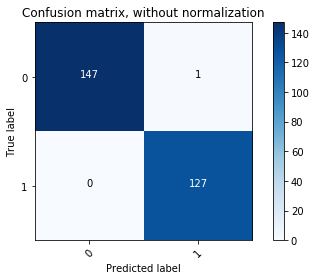

In [19]:
#Visualising the result after using Decision Tree Classifier
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(mat, classes=[0,1],
    title='Confusion matrix, without normalization')

In [20]:
#Splitting our confusion matrix into their corresponding semantics
tp=mat[0][0]
tn=mat[1][1]
fp=mat[1][0]
fn=mat[0][1]

In [21]:
#Calaculating the necessary statistical metrics of our model
acc=(tp+tn)/(tp+tn+fp+fn)*100
error=(100-acc)
prec=(tp/(tp+fp))*100
sens=(tp/(tp+fn))*100
spec=(tn/(tn+fp))*100
print("accuracy: ",round(acc,4))
print("error rate: ",round(error,4))
print("precision: ",round(prec,4))
print("sensitivity: ",round(sens,4))
print("specificity: ",round(spec,4))

accuracy:  99.6364
error rate:  0.3636
precision:  100.0
sensitivity:  99.3243
specificity:  100.0


In [39]:
from sklearn.ensemble import RandomForestClassifier

iris=dataset
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(X_train, y_train)
estimator_nonlimited = model.estimators_[5]

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot',rounded = True, proportion = False, precision = 2, filled = True)
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', rounded = True, proportion = False, precision = 2, filled = True)

the graph is created using graphviz file format dot
and then the dot file is coverted to png format using GVedit

In [61]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (280, 360))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [57]:
"""
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
from subprocess import call
import subprocess

z="call(['dot', '-Tpng', dot_data, '-o', 'tree.png', '-Gdpi=600'])"
process = subprocess.Popen(z, shell=True)
call(['dot', '-Tpng', dot_data, '-o', 'tree.png', '-Gdpi=600'])
#Image(graph.create_png())"""

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [62]:
"""# Convert to png
import subprocess 
#call(['dot', '-Tpng', 'tree_nonlimited.dot', '-o', 'tree.png', '-Gdpi=600'])
z="call(['dot', '-Tpng', 'tree_nonlimited.dot', '-o', 'tree.png', '-Gdpi=600'])"
process = subprocess.Popen(z, shell=True)"""


'# Convert to png\nimport subprocess \n#call([\'dot\', \'-Tpng\', \'tree_nonlimited.dot\', \'-o\', \'tree.png\', \'-Gdpi=600\'])\nz="call([\'dot\', \'-Tpng\', \'tree_nonlimited.dot\', \'-o\', \'tree.png\', \'-Gdpi=600\'])"\nprocess = subprocess.Popen(z, shell=True)'